## Goals for This Analysis

#### Basic Analysis
1. Figure out what the table represents
2. Analyze Personality Sensitivity
3. Personality Correlation Analysis
4. Create Action Profiles

#### Advanced Analysis
4. Compute Personality Outcomes
5. Design Game Strategies

---

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


#### 1. Figuring out what the table represents

In [14]:
df = pd.read_csv('Copy of Refind Self_ The Personality Test Game - Actions Spreadsheet.csv')
display(df)

,ACTION,Adventurer,Researcher,Artisan,Traveler,Butler,Leader,Judge,Clergy,Pacifist,...,Planner,Samurai,Philosopher,Martial Artist,Clown,Sage,Hero,Gambler,Merchant,Collector
0,Started the game,0,0,0,0,-2,0,-1,-1,0,...,0,-6,4,0,0,0,0,0,0,0
1,Delayed progress of test,0,0,0,0,0,0,0,0,0,...,2,0,0,0,-1,0,-2,0,0,0
2,Didn't delay progress of test,0,0,0,0,0,0,0,0,2,...,-4,0,0,2,2,0,0,0,0,0
3,Finished within 20 minutes,0,0,0,0,0,0,0,0,0,...,-4,0,0,0,0,0,0,0,0,0
4,Finished within 25 minutes,0,0,0,0,0,0,0,0,0,...,-2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,"Bought ""That Day"" at the ramen shop",-1,-1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
653,"Bought ""The New World"" at the ramen shop",2,2,0,2,-2,0,0,0,0,...,0,0,0,0,2,-2,0,0,0,0
654,"Bought ""Glimmer"" at the ramen shop",-2,-2,0,0,0,0,2,0,0,...,0,0,0,0,0,4,0,-2,0,0
655,Didn't hesitate when buying ramen,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


The table above shows the points added or deducted for each action across various personality types. At the end of the game, the personality type with the highest score is considered the player's "most representative" personality trait.

#### 2. Analyze Personality Sensitivity

In [16]:
df_drop_action = df.drop(df.columns[0], axis=1)

In [21]:
most_dominant_personality = df_drop_action.sum().idxmax()
least_dominant_personality = df_drop_action.sum().idxmin()
print(f"The most dominant personality type is: {most_dominant_personality}")
print(f"The least dominant personality type is: {least_dominant_personality}")

The most dominant personality type is: Philosopher
The least dominant personality type is: Samurai


In [22]:
df_drop_action.var(axis=0)  # Variance for each personality type

Adventurer        0.655130
Researcher        0.540762
Artisan           0.778571
Traveler          0.830814
Butler            0.538636
Leader            0.636838
Judge             1.080855
Clergy            1.065068
Pacifist          0.783620
Solo Player       0.823496
Bancho            0.740812
Runner            1.063987
Challenger        0.513550
Planner           1.088373
Samurai           0.771109
Philosopher       1.029360
Martial Artist    0.866021
Clown             0.958714
Sage              1.690867
Hero              1.370448
Gambler           1.508645
Merchant          0.813222
Collector         1.267792
dtype: float64

In [23]:
df_drop_action.max(axis=0) - df_drop_action.min(axis=0)  # Range for each type

Adventurer        12
Researcher        10
Artisan            8
Traveler           8
Butler             8
Leader             8
Judge             12
Clergy            10
Pacifist          14
Solo Player       12
Bancho            10
Runner            10
Challenger        10
Planner           10
Samurai           16
Philosopher       16
Martial Artist    12
Clown              8
Sage              14
Hero              12
Gambler           14
Merchant          12
Collector         12
dtype: int64

In [27]:
# Create an empty dictionary to store results
results = []

# Iterate through each personality type (skip 'Action' column)
for col in df.columns[1:]:
    max_value = df[col].max()  # Get the maximum points for this type
    min_value = df[col].min()  # Get the minimum points for this type

    # Find all actions with the max and min points
    max_actions = df[df[col] == max_value]['ACTION'].tolist()
    min_actions = df[df[col] == min_value]['ACTION'].tolist()

    # Store the results
    results.append({
        'Personality Type': col,
        'Max Points Actions': max_actions,
        'Max Points Value': max_value,
        'Min Points Actions': min_actions,
        'Min Points Value': min_value
    })

# Convert results into a DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the results
results_df

,Personality Type,Max Points Actions,Max Points Value,Min Points Actions,Min Points Value
0,Adventurer,[Walked way down the coast],8,"[In action game stage 4, ignored empty-looking...",-4
1,Researcher,[Read a total of 14 things],6,"[In battle, didn't use Guard, Closed the lid o...",-4
2,Artisan,"[Smoked 10 cigarettes, Touched streetlights 40...",4,"[Pulled at first tug when fishing, At café, fo...",-4
3,Traveler,"[Exited slots with coins left, In battle, used...",4,"[At café, for 3rd customer, put in Hot, Feedin...",-4
4,Butler,"[Pulled at first tug when fishing, At café, fo...",4,"[Headed left first thing, At café, for 4th cus...",-4
5,Leader,"[Cut 3 bomb wires, Closed the lid on the trash...",4,"[When reporting touching sheep, didn't actuall...",-4
6,Judge,[Answered a dialogue choice displayed in red a...,4,[Touched the photo of the two of you 11+ times],-8
7,Clergy,"[Checked the grave first thing, Offered a flow...",4,"[Declared to Mirai ""I'll kill you""]",-6
8,Pacifist,"[In action game stage 10, didn't get any coins]",6,"[Declared to Mirai ""I'll kill you""]",-8
9,Solo Player,"[For final action, smoked a cigarette]",6,"[For final action, talked to someone]",-6


#### 3. Personality Correlation Analysis

In [5]:
corr_matrix = df_drop_action.corr()
print(corr_matrix)


                Adventurer  Researcher   Artisan  Traveler    Butler  \
Adventurer        1.000000    0.074951 -0.059196  0.082423 -0.072149   
Researcher        0.074951    1.000000 -0.005192  0.048632 -0.036203   
Artisan          -0.059196   -0.005192  1.000000 -0.486358 -0.015098   
Traveler          0.082423    0.048632 -0.486358  1.000000 -0.077571   
Butler           -0.072149   -0.036203 -0.015098 -0.077571  1.000000   
Leader           -0.054252   -0.108057  0.018667 -0.087790  0.141139   
Judge            -0.085804   -0.041982  0.050391 -0.142024 -0.009597   
Clergy           -0.014358   -0.001266 -0.045374 -0.027238  0.058549   
Pacifist         -0.093855   -0.079074  0.024471 -0.086958  0.036953   
Solo Player      -0.006191   -0.014728 -0.094273 -0.003408  0.021600   
Bancho           -0.041535    0.032762  0.014921 -0.030770 -0.104154   
Runner           -0.273165   -0.064594 -0.062102  0.033249  0.000518   
Challenger        0.049642    0.079067 -0.018215  0.016336  0.07

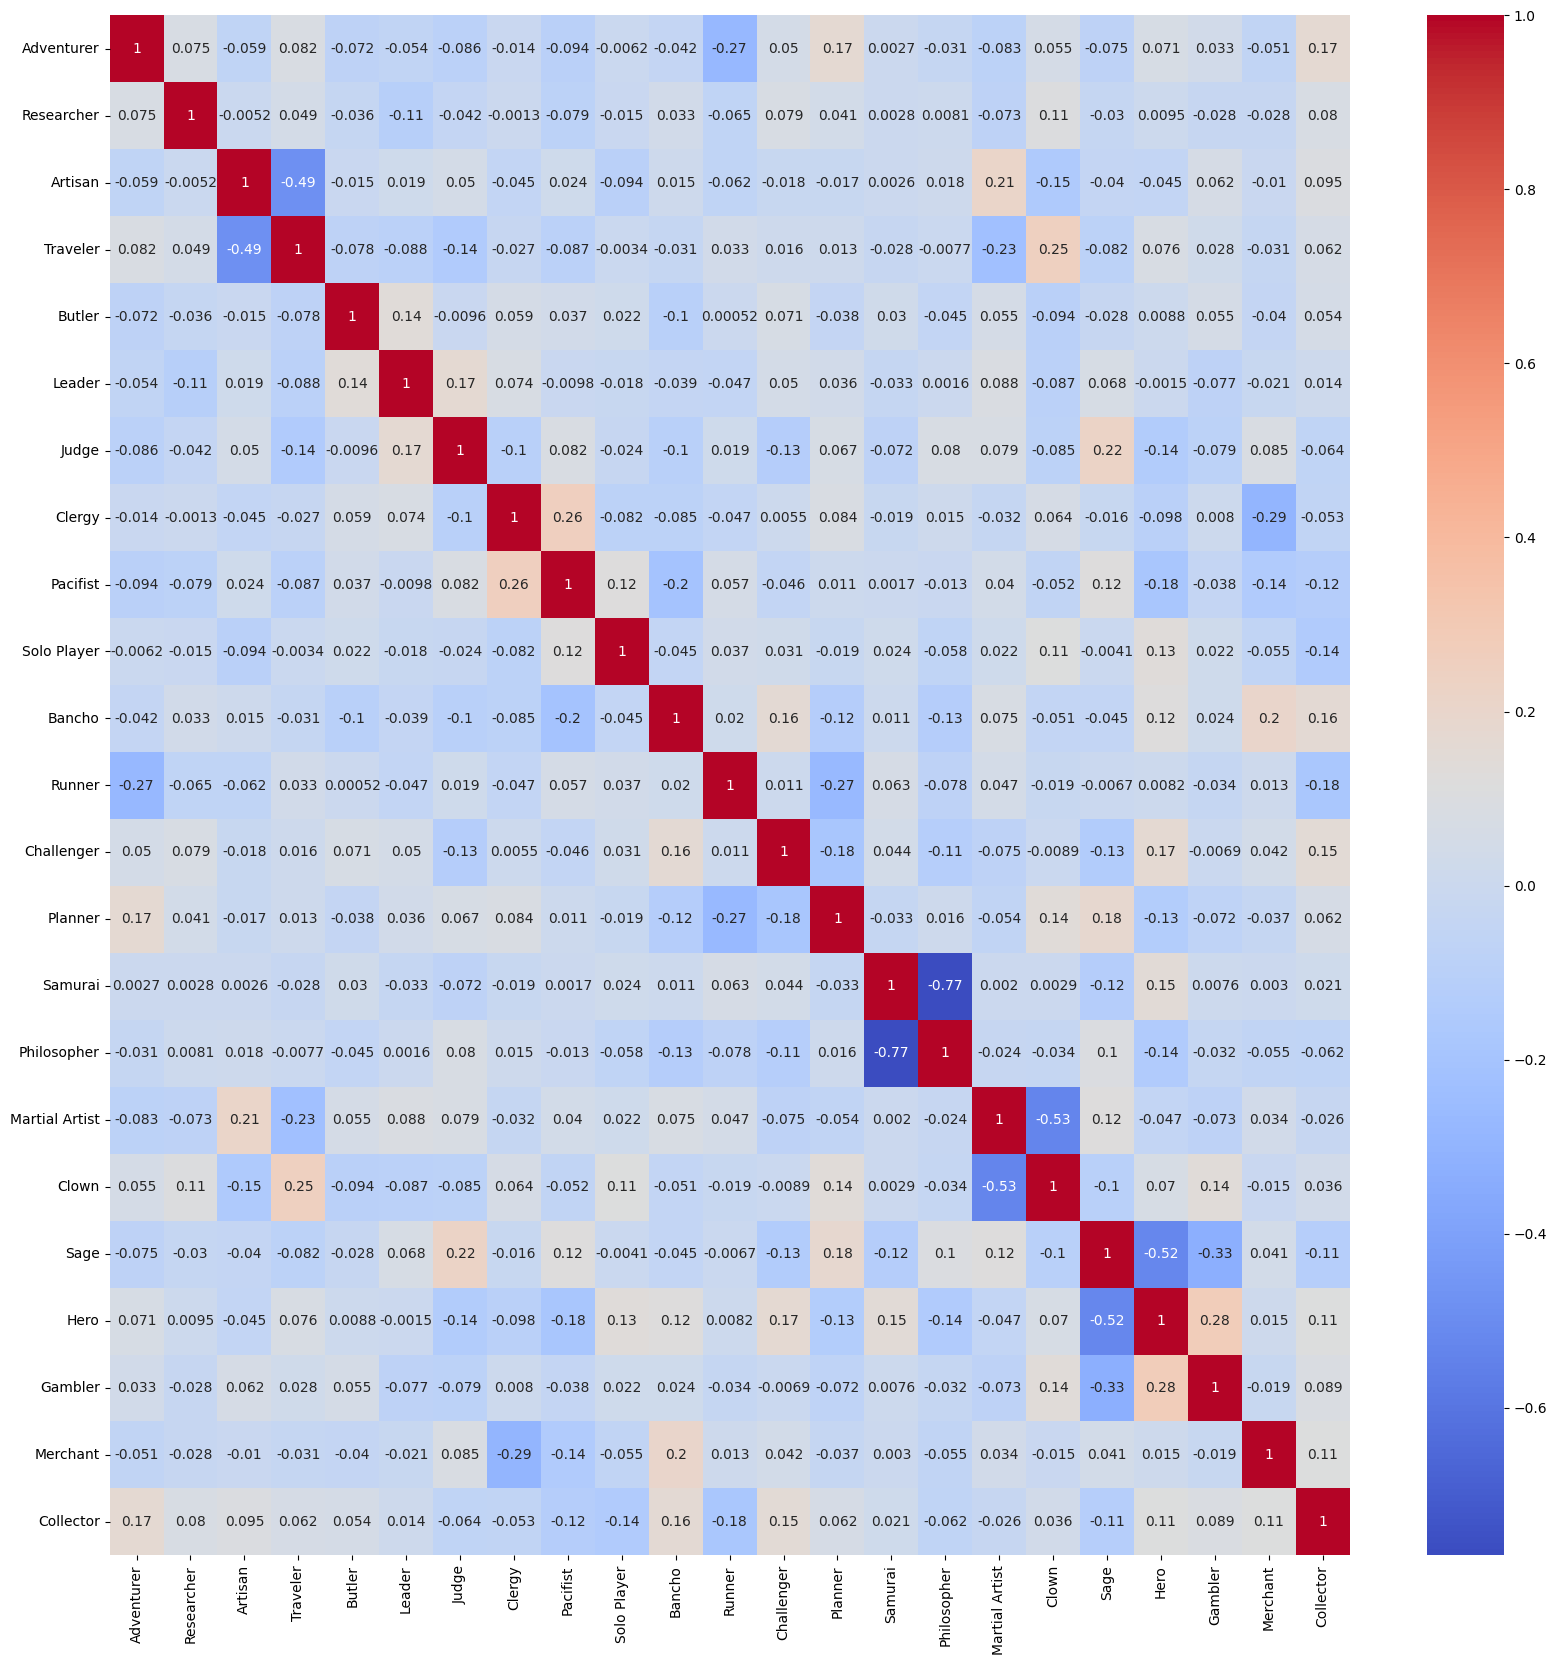

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


#### 4. Create Action Profiles

In [29]:
# Calculate Net Effect of each ACtion
df_drop_action['NetEffect'] = df_drop_action.sum(axis=1)

# Label action profiles based on net effect
df_drop_action['ActionProfile'] = 'Neutral'
df_drop_action.loc[df_drop_action['NetEffect'] > 2, 'ActionProfile'] = 'Positive'
df_drop_action.loc[df_drop_action['NetEffect'] < -2, 'ActionProfile'] = 'Negative'

In [30]:
df_drop_action

,Adventurer,Researcher,Artisan,Traveler,Butler,Leader,Judge,Clergy,Pacifist,Solo Player,...,Philosopher,Martial Artist,Clown,Sage,Hero,Gambler,Merchant,Collector,NetEffect,ActionProfile
0,0,0,0,0,-2,0,-1,-1,0,2,...,4,0,0,0,0,0,0,0,-4,Negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,-2,0,0,0,-1,Neutral
2,0,0,0,0,0,0,0,0,2,2,...,0,2,2,0,0,0,0,0,8,Positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neutral
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,-1,-1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neutral
653,2,2,0,2,-2,0,0,0,0,0,...,0,0,2,-2,0,0,0,0,4,Positive
654,-2,-2,0,0,0,0,2,0,0,0,...,0,0,0,4,0,-2,0,0,0,Neutral
655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Neutral
